In [1]:
# Notebooks/feature-engineering-analysis.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set display options for clarity
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the enhanced dataset (update the path as necessary)
file_path = '/Users/harshil/Developer/GitHub_Repos/FailFix/Data/processed/artifact_data_final_enhanced.csv'
df = pd.read_csv(file_path, low_memory=False)

# Convert commit timestamp strings to datetime objects
df['failed_commit'] = pd.to_datetime(df['failed_commit'])
df['passed_commit'] = pd.to_datetime(df['passed_commit'])

# Optional: Compute additional time gap components in seconds and minutes
df['time_to_fix_seconds'] = (df['passed_commit'] - df['failed_commit']).dt.total_seconds()
df['time_to_fix_minutes'] = df['time_to_fix_seconds'] / 60

# Quick check on the data
df.head()

,repo,lang,build_system,test_framework,ci_service,image_tag,failed_commit,passed_commit,time_to_fix_hours,classification_code,classification_test,classification_build,exceptions,failed_tests,num_tests_failed,num_tests_run,metrics_additions,metrics_deletions,metrics_changes,metrics_num_files_changed,has_test_info,has_exception_info,primary_exception,exception_category,fix_time_category,is_outlier,changes_per_file,tests_per_change,complexity_category,exception_chain,chain_length,test_density,failure_density,time_to_fix_seconds,time_to_fix_minutes
0,wbond/package_control_channel,Python,Unknown,unittest,travis,wbond-package_control_channel-379589051,2018-05-16 07:40:38+00:00,2018-05-17 08:06:11+00:00,24.425833,No,No,No,AssertionError,test_repository_package_names('./repository/c....,1,8451,43,9,52,5,True,True,AssertionError,Assertion,Same Week (<168hrs),True,10.4,162.519231,Very Complex,['AssertionError'],1,159.452830,0.000118,87933.0,1465.550000
1,checkstyle/checkstyle,Java,Maven,Unknown,travis,checkstyle-checkstyle-248927615,2017-06-30 20:23:46+00:00,2017-06-30 20:44:02+00:00,0.337778,No,Yes,No,No Exception Recorded,NaN,0,0,6,4,10,2,False,False,No Exception Recorded,Other,Quick Fix (<1hr),False,5.0,0.000000,Moderate,[],0,0.000000,0.000000,1216.0,20.266667
2,AgentOps-AI/agentops,Python,Unknown,pytest,github,AgentOps-AI-agentops-26732387115,2024-06-26 22:21:26+00:00,2024-06-26 22:39:59+00:00,0.309167,Yes,No,No,ImportError,(tests.test_canary)#(tests.test_events)#(tests...,12,12,3,1,4,1,True,True,ImportError,Other,Quick Fix (<1hr),False,4.0,3.000000,Moderate,['ImportError'],1,2.400000,1.000000,1113.0,18.550000
3,square/retrofit,Java,Maven,JUnit,travis,square-retrofit-65662934,2015-06-06 04:35:33+00:00,2015-06-08 02:55:01+00:00,46.324444,Partial,Partial,No,AssertionError,typeVariableNoBoundThrows(retrofit.RestAdapter...,3,119,80,68,148,4,True,True,AssertionError,Assertion,Same Week (<168hrs),True,37.0,0.804054,Very Complex,['AssertionError'],1,0.798658,0.025210,166768.0,2779.466667
4,traccar/traccar,Java,Maven,JUnit,travis,tananaev-traccar-213175603,2017-03-20 13:42:22+00:00,2017-03-20 13:45:07+00:00,0.045833,No,Yes,No,AssertionError,testDecode(org.traccar.protocol.Gl200ProtocolD...,1,237,1,1,2,1,True,True,AssertionError,Assertion,Quick Fix (<1hr),False,2.0,118.500000,Very Simple,['AssertionError'],1,79.000000,0.004219,165.0,2.750000


In [2]:
# Extract the day name and hour from the 'failed_commit' timestamp
df['failed_day'] = df['failed_commit'].dt.day_name()
df['failed_hour'] = df['failed_commit'].dt.hour

# Optionally, you can also extract similar features from 'passed_commit'
df['passed_day'] = df['passed_commit'].dt.day_name()
df['passed_hour'] = df['passed_commit'].dt.hour

# Display unique days and hour distributions to get a sense of the data
print("Unique days of failure:", df['failed_day'].unique())
print("Distribution of failure hours:")
print(df['failed_hour'].value_counts().sort_index())

Unique days of failure: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Thursday' 'Tuesday' 'Sunday']
Distribution of failure hours:
failed_hour
0      58
1      91
2      84
3      69
4      80
5      62
6      80
7     111
8      91
9     127
10     55
11     96
12    136
13    152
14    138
15    137
16    140
17    131
18    146
19     91
20    128
21    100
22    119
23    107
Name: count, dtype: int64


In [3]:
# First, sort the DataFrame by repository and failure timestamp
df = df.sort_values(by=['repo', 'failed_commit'])

# Compute a rolling average of 'time_to_fix_hours' for each repository
# Here we use a window of 3 artifacts as an example; adjust window size as needed.
df['rolling_avg_fix_time'] = df.groupby('repo')['time_to_fix_hours'] \
                                .transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Display a sample of the results to verify the rolling average calculation
df[['repo', 'failed_commit', 'time_to_fix_hours', 'rolling_avg_fix_time']].head(10)

,repo,failed_commit,time_to_fix_hours,rolling_avg_fix_time
824,Adobe-Consulting-Services/acs-aem-commons,2017-12-13 13:44:03+00:00,4.579167,4.579167
1904,Adobe-Consulting-Services/acs-aem-commons,2017-12-13 13:44:03+00:00,4.579167,4.579167
77,Adobe-Consulting-Services/acs-aem-commons,2018-02-01 16:01:02+00:00,0.531944,3.230093
471,Adobe-Consulting-Services/acs-aem-commons,2018-02-01 16:01:02+00:00,0.531944,1.881019
2210,Adobe-Consulting-Services/acs-aem-commons,2018-02-01 16:01:02+00:00,0.531944,0.531944
2300,Adobe-Consulting-Services/acs-aem-commons,2018-02-01 16:01:02+00:00,0.531944,0.531944
2361,Adobe-Consulting-Services/acs-aem-commons,2018-02-01 16:01:02+00:00,0.531944,0.531944
122,Adobe-Consulting-Services/acs-aem-commons,2018-03-26 20:59:08+00:00,0.435833,0.499907
672,Adobe-Consulting-Services/acs-aem-commons,2018-03-26 20:59:08+00:00,0.435833,0.467870
1133,Adobe-Consulting-Services/acs-aem-commons,2018-03-26 20:59:08+00:00,0.435833,0.435833


In [4]:
# Compute the overall code churn as the sum of code additions and deletions.
df['code_churn'] = df['metrics_additions'] + df['metrics_deletions']

# Quick check: display summary statistics of the new feature.
print("Code Churn Summary:")
print(df['code_churn'].describe())

Code Churn Summary:
count     2529.000000
mean       153.580071
std        795.094824
min          0.000000
25%          3.000000
50%          9.000000
75%         36.000000
max      24203.000000
Name: code_churn, dtype: float64


In [5]:
# Normalize the total changes by the number of files changed.
# Use .clip(lower=1) to avoid division by zero.
df['changes_per_file'] = df['metrics_changes'] / df['metrics_num_files_changed'].clip(lower=1)

# Display summary statistics for changes per file.
print("Changes per File Summary:")
print(df['changes_per_file'].describe())

Changes per File Summary:
count     2529.000000
mean        26.449577
std        484.435499
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max      24203.000000
Name: changes_per_file, dtype: float64


In [6]:
df['add_del_ratio'] = df.apply(
    lambda row: row['metrics_additions'] / row['metrics_deletions'] if row['metrics_deletions'] > 0 else np.nan,
    axis=1
)

In [7]:
print(df.columns.tolist())

['repo', 'lang', 'build_system', 'test_framework', 'ci_service', 'image_tag', 'failed_commit', 'passed_commit', 'time_to_fix_hours', 'classification_code', 'classification_test', 'classification_build', 'exceptions', 'failed_tests', 'num_tests_failed', 'num_tests_run', 'metrics_additions', 'metrics_deletions', 'metrics_changes', 'metrics_num_files_changed', 'has_test_info', 'has_exception_info', 'primary_exception', 'exception_category', 'fix_time_category', 'is_outlier', 'changes_per_file', 'tests_per_change', 'complexity_category', 'exception_chain', 'chain_length', 'test_density', 'failure_density', 'time_to_fix_seconds', 'time_to_fix_minutes', 'failed_day', 'failed_hour', 'passed_day', 'passed_hour', 'rolling_avg_fix_time', 'code_churn', 'add_del_ratio']


In [8]:
# import seaborn as sns

# # Plot histograms to visualize the distributions of the computed metrics.
# plt.figure(figsize=(15, 4))

# # Code churn distribution
# plt.subplot(1, 3, 1)
# sns.histplot(df['code_churn'], bins=30, kde=True)
# plt.title('Distribution of Code Churn')
# plt.xlabel('Code Churn (Additions + Deletions)')

# # Additions-to-Deletions Ratio distribution
# plt.subplot(1, 3, 2)
# sns.histplot(df['add_del_ratio'].dropna(), bins=30, kde=True)
# plt.title('Distribution of Additions-to-Deletions Ratio')
# plt.xlabel('Additions-to-Deletions Ratio')

# # Changes per File distribution
# plt.subplot(1, 3, 3)
# sns.histplot(df['changes_per_file'], bins=30, kde=True)
# plt.title('Distribution of Changes per File')
# plt.xlabel('Changes per File')

# plt.tight_layout()
# plt.show()

In [9]:
# Compute test failure rate: number of tests failed divided by number of tests run
df['test_failure_rate'] = df.apply(
    lambda row: row['num_tests_failed'] / row['num_tests_run'] if row['num_tests_run'] > 0 else np.nan,
    axis=1
)

# Display summary statistics for test failure rate
print("Test Failure Rate Summary:")
print(df['test_failure_rate'].describe())

Test Failure Rate Summary:
count    1536.000000
mean        0.051349
std         0.167429
min         0.000000
25%         0.000162
50%         0.001704
75%         0.017570
max         1.000000
Name: test_failure_rate, dtype: float64


In [10]:
# Compute test density: tests run per code change (adding 1 to avoid division by zero)
df['test_density'] = df.apply(
    lambda row: row['num_tests_run'] / (row['metrics_changes'] + 1), axis=1
)

# Display summary statistics for test density
print("Test Density Summary:")
print(df['test_density'].describe())


Test Density Summary:
count      2529.000000
mean        476.028488
std        7798.179155
min           0.000000
25%           0.000000
50%           3.600000
75%          86.333333
max      243628.285714
Name: test_density, dtype: float64


In [11]:
# import seaborn as sns

# plt.figure(figsize=(12, 5))

# # Plot Test Failure Rate distribution
# plt.subplot(1, 2, 1)
# sns.histplot(df['test_failure_rate'].dropna(), bins=30, kde=True)
# plt.title('Distribution of Test Failure Rate')
# plt.xlabel('Test Failure Rate')

# # Plot Test Density distribution
# plt.subplot(1, 2, 2)
# sns.histplot(df['test_density'].dropna(), bins=30, kde=True)
# plt.title('Distribution of Test Density')
# plt.xlabel('Test Density (Tests Run per Code Change)')

# plt.tight_layout()
# plt.show()

In [12]:
# Compute the exception chain length by splitting on ';'
df['exception_chain_length'] = df['exceptions'].apply(
    lambda x: len(x.split(';')) if x and x != 'No Exception Recorded' else 0
)

# Display summary statistics for the chain length
print("Exception Chain Length Summary:")
print(df['exception_chain_length'].describe())

Exception Chain Length Summary:
count    2529.000000
mean        0.684065
std         0.807542
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: exception_chain_length, dtype: float64


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Filter rows with an exception message (exclude those with 'No Exception Recorded')
exceptions_mask = df['exceptions'] != 'No Exception Recorded'
exceptions_text = df.loc[exceptions_mask, 'exceptions']

# If there are any exceptions, proceed with clustering
if not exceptions_text.empty:
    # Convert the exception messages to TF-IDF features
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(exceptions_text)
    
    # Define number of clusters (this number can be tuned)
    num_clusters = 5
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Create a new column for the cluster label (for rows with exception messages)
    df.loc[exceptions_mask, 'exception_cluster'] = clusters
    
    # For each cluster, print the top terms to understand the grouping
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    print("Top terms per cluster:")
    for i in range(num_clusters):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        print(f"Cluster {i}: {top_terms}")
else:
    print("No exception messages to cluster.")

# Create a binary feature indicating if an artifact has a known exception
# (i.e., if its exception_category is not 'Other')
df['has_known_exception'] = df['exception_category'] != 'Other'

# Optionally, inspect a few rows with the new columns:
print(df[['exceptions', 'exception_cluster', 'exception_category', 'has_known_exception']].head())

Top terms per cluster:
Cluster 0: ['assertionerror', 'comparisonfailure', 'assertionfailederror', 'typeerror', 'assertionfailure', 'illegalargumentexception', 'illegalstateexception', 'filenotfounderror', 'runtimeerror', 'valueerror']
Cluster 1: ['exception', 'builderexception', 'persistenceexception', 'illegalstateexception', 'expectationerror', 'unexpectedinvocation', 'unsupportedclassversionerror', 'classnotfoundexception', 'nullpointerexception', 'exceptionininitializererror']
Cluster 2: ['attributeerror', 'assertionerror', 'ioerror', 'runtimeerror', 'importerror', 'oserror', 'typeerror', 'filenotfoundexception', 'headlessexception', 'hostedmodeexception']
Cluster 3: ['nullpointerexception', 'assertionerror', 'assertionfailederror', 'invocationtargetexception', 'wantedbutnotinvoked', 'comparisonfailure', 'illegalargumentexception', 'illegalstateexception', 'configurationexception', 'runtimeexception']
Cluster 4: ['importerror', 'modulenotfounderror', 'exceptionduringrun', 'valueerr

In [14]:
# Compute the artifact count per repository
repo_counts = df.groupby('repo').size().rename('artifact_count')

# Merge the artifact count back into the DataFrame based on the 'repo' column
df = df.merge(repo_counts, on='repo')

# Display a sample to verify the new column
print("Sample of artifact counts per repository:")
print(df[['repo', 'artifact_count']].drop_duplicates().head())

Sample of artifact counts per repository:
                                         repo  artifact_count
0   Adobe-Consulting-Services/acs-aem-commons              31
31                       AgentOps-AI/agentops              28
59                   Azure/azure-sdk-for-java               7
66                     Bammerbom/UltimateCore               1
67                  Charcoal-SE/SmokeDetector               7


In [15]:
# Group by 'repo' and calculate the mean and standard deviation of time_to_fix_hours
repo_stats = df.groupby('repo')['time_to_fix_hours'].agg(['mean', 'std'])

# Compute the coefficient of variation as a measure of fix consistency:
# lower values indicate more consistency (i.e., less variability in fix times)
repo_stats['fix_consistency'] = repo_stats['std'] / repo_stats['mean']

# Merge these statistics back into the main DataFrame
df = df.merge(repo_stats, on='repo', how='left')

# Display a sample to verify that the new columns were added
print("Sample of repository fix consistency statistics:")
print(df[['repo', 'time_to_fix_hours', 'mean', 'std', 'fix_consistency']].head())

Sample of repository fix consistency statistics:
                                        repo  time_to_fix_hours      mean      std  fix_consistency
0  Adobe-Consulting-Services/acs-aem-commons           4.579167  1.509328  1.09283         0.724051
1  Adobe-Consulting-Services/acs-aem-commons           4.579167  1.509328  1.09283         0.724051
2  Adobe-Consulting-Services/acs-aem-commons           0.531944  1.509328  1.09283         0.724051
3  Adobe-Consulting-Services/acs-aem-commons           0.531944  1.509328  1.09283         0.724051
4  Adobe-Consulting-Services/acs-aem-commons           0.531944  1.509328  1.09283         0.724051


In [16]:
# Compute the complexity indicator as the product of code churn and exception chain length
df['complexity_indicator'] = df['code_churn'] * df['exception_chain_length']

# Display summary statistics for the new complexity indicator
print("Complexity Indicator Summary:")
print(df['complexity_indicator'].describe())

Complexity Indicator Summary:
count     2529.000000
mean        67.297351
std        426.627027
min          0.000000
25%          0.000000
50%          2.000000
75%         14.000000
max      11282.000000
Name: complexity_indicator, dtype: float64


In [17]:
# Apply a log1p transformation (log(1+x)) to stabilize variance in skewed features
df['log_time_to_fix'] = np.log1p(df['time_to_fix_hours'])
df['log_code_churn'] = np.log1p(df['code_churn'])
df['log_metrics_changes'] = np.log1p(df['metrics_changes'])

# Display summary statistics for the log-transformed features
print("Log-transformed Time to Fix (hours) Summary:")
print(df['log_time_to_fix'].describe())

print("\nLog-transformed Code Churn Summary:")
print(df['log_code_churn'].describe())

print("\nLog-transformed Metrics Changes Summary:")
print(df['log_metrics_changes'].describe())

Log-transformed Time to Fix (hours) Summary:
count    2529.000000
mean        1.083075
std         1.440651
min         0.000555
25%         0.126877
50%         0.374051
75%         1.547917
max         8.528929
Name: log_time_to_fix, dtype: float64

Log-transformed Code Churn Summary:
count    2529.000000
mean        2.764494
std         1.768899
min         0.000000
25%         1.386294
50%         2.302585
75%         3.610918
max        10.094273
Name: log_code_churn, dtype: float64

Log-transformed Metrics Changes Summary:
count    2529.000000
mean        2.764494
std         1.768899
min         0.000000
25%         1.386294
50%         2.302585
75%         3.610918
max        10.094273
Name: log_metrics_changes, dtype: float64


In [18]:
# Define a function to compute the upper bound for outliers using the IQR method
def compute_upper_bound(series, factor=3):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q3 + factor * iqr

# Outlier analysis for time_to_fix_hours
fix_upper_bound = compute_upper_bound(df['time_to_fix_hours'])
outliers_fix = df[df['time_to_fix_hours'] > fix_upper_bound]
print("Time-to-Fix Hours Outliers (above {:.2f}): {} artifacts".format(fix_upper_bound, outliers_fix.shape[0]))
display(outliers_fix.sort_values(by='time_to_fix_hours', ascending=False).head(10))

# Outlier analysis for code_churn
churn_upper_bound = compute_upper_bound(df['code_churn'])
outliers_churn = df[df['code_churn'] > churn_upper_bound]
print("\nCode Churn Outliers (above {:.2f}): {} artifacts".format(churn_upper_bound, outliers_churn.shape[0]))
display(outliers_churn.sort_values(by='code_churn', ascending=False).head(10))

# Outlier analysis for complexity_indicator
complex_upper_bound = compute_upper_bound(df['complexity_indicator'])
outliers_complex = df[df['complexity_indicator'] > complex_upper_bound]
print("\nComplexity Indicator Outliers (above {:.2f}): {} artifacts".format(complex_upper_bound, outliers_complex.shape[0]))
display(outliers_complex.sort_values(by='complexity_indicator', ascending=False).head(10))

Time-to-Fix Hours Outliers (above 14.40): 395 artifacts


,repo,lang,build_system,test_framework,ci_service,image_tag,failed_commit,passed_commit,time_to_fix_hours,classification_code,classification_test,classification_build,exceptions,failed_tests,num_tests_failed,num_tests_run,metrics_additions,metrics_deletions,metrics_changes,metrics_num_files_changed,has_test_info,has_exception_info,primary_exception,exception_category,fix_time_category,is_outlier,changes_per_file,tests_per_change,complexity_category,exception_chain,chain_length,test_density,failure_density,time_to_fix_seconds,time_to_fix_minutes,failed_day,failed_hour,passed_day,passed_hour,rolling_avg_fix_time,code_churn,add_del_ratio,test_failure_rate,exception_chain_length,exception_cluster,has_known_exception,artifact_count,mean,std,fix_consistency,complexity_indicator,log_time_to_fix,log_code_churn,log_metrics_changes
1377,petergeneric/stdlib,Java,Maven,JUnit,travis,petergeneric-stdlib-190395339,2017-01-09 21:09:08+00:00,2017-08-08 15:10:36+00:00,5058.024444,Partial,Partial,Partial,NoSuchMethodError,testDb(com.peterphi.usermanager.db.dao.CreateD...,1,177,3606,1920,5526,136,True,True,NoSuchMethodError,Other,Extended Fix,True,40.632353,0.032030,Very Complex,['NoSuchMethodError'],1,0.032025,0.005650,18208888.0,303481.466667,Monday,21,Tuesday,15,1686.417315,5526,1.878125,0.005650,1,0.0,False,9,1124.205926,2230.265493,1.983859,5526,8.528929,8.617400,8.617400
1378,petergeneric/stdlib,Java,Maven,JUnit,travis,petergeneric-stdlib-190395481,2017-01-09 21:09:08+00:00,2017-08-08 15:10:36+00:00,5058.024444,Partial,Partial,Partial,NoSuchMethodError,testDb(com.peterphi.usermanager.db.dao.CreateD...,1,177,3606,1920,5526,136,True,True,NoSuchMethodError,Other,Extended Fix,True,40.632353,0.032030,Very Complex,['NoSuchMethodError'],1,0.032025,0.005650,18208888.0,303481.466667,Monday,21,Tuesday,15,3372.407130,5526,1.878125,0.005650,1,0.0,False,9,1124.205926,2230.265493,1.983859,5526,8.528929,8.617400,8.617400
1303,ocpsoft/rewrite,Java,Maven,JUnit,travis,ocpsoft-rewrite-103410808,2016-01-19 18:17:06+00:00,2016-07-16 21:37:40+00:00,4299.342778,Partial,Partial,No,RuntimeException;IllegalStateException;Asserti...,requestUrlsDirect(org.ocpsoft.rewrite.servlet....,2,284,593,872,1465,35,True,True,RuntimeException,Runtime,Extended Fix,True,41.857143,0.193857,Very Complex,"['RuntimeException', 'IllegalStateException', ...",3,0.193724,0.007042,15477634.0,257960.566667,Tuesday,18,Saturday,21,2866.762222,1465,0.680046,0.007042,3,0.0,True,7,1229.184048,2097.317706,1.706268,4395,8.366450,7.290293,7.290293
1302,ocpsoft/rewrite,Java,Maven,JUnit,travis,ocpsoft-rewrite-103410809,2016-01-19 18:17:06+00:00,2016-07-16 21:37:40+00:00,4299.342778,Partial,Partial,No,AssertionError,requestUrlsDirect(org.ocpsoft.rewrite.servlet....,2,279,593,872,1465,35,True,True,AssertionError,Assertion,Extended Fix,True,41.857143,0.190444,Very Complex,['AssertionError'],1,0.190314,0.007168,15477634.0,257960.566667,Tuesday,18,Saturday,21,1434.073519,1465,0.680046,0.007168,1,0.0,True,7,1229.184048,2097.317706,1.706268,1465,8.366450,7.290293,7.290293
611,charite/jannovar,Java,Maven,Unknown,travis,charite-jannovar-100092142,2016-01-04 11:34:45+00:00,2016-02-29 14:49:11+00:00,1347.240556,No,Yes,No,ComparisonFailure,NaN,0,0,4,4,8,4,False,True,ComparisonFailure,Assertion,Extended Fix,True,2.000000,0.000000,Very Complex,['ComparisonFailure'],1,0.000000,0.000000,4850066.0,80834.433333,Monday,11,Monday,14,1347.240556,8,1.000000,NaN,1,0.0,True,6,685.058380,725.796032,1.059466,8,7.206556,2.197225,2.197225
609,charite/jannovar,Java,Maven,Unknown,travis,charite-jannovar-100092144,2016-01-04 11:34:45+00:00,2016-02-29 14:49:11+00:00,1347.240556,No,Yes,No,ComparisonFailure,NaN,0,0,4,4,8,4,False,True,ComparisonFailure,Assertion,Extended Fix,True,2.000000,0.000000,Very Complex,['ComparisonFailure'],1,0.000000,0.000000,4850066.0,80834.433333,Monday,11,Monday,14,1347.240556,8,1.000000,NaN,1,0.0,True,6,685.058380,725.796032,1.059466,8,7.206556,2.197225,2.197225
610,charite/jannovar,Java,Maven,Unknown,trav


Code Churn Outliers (above 135.00): 351 artifacts


,repo,lang,build_system,test_framework,ci_service,image_tag,failed_commit,passed_commit,time_to_fix_hours,classification_code,classification_test,classification_build,exceptions,failed_tests,num_tests_failed,num_tests_run,metrics_additions,metrics_deletions,metrics_changes,metrics_num_files_changed,has_test_info,has_exception_info,primary_exception,exception_category,fix_time_category,is_outlier,changes_per_file,tests_per_change,complexity_category,exception_chain,chain_length,test_density,failure_density,time_to_fix_seconds,time_to_fix_minutes,failed_day,failed_hour,passed_day,passed_hour,rolling_avg_fix_time,code_churn,add_del_ratio,test_failure_rate,exception_chain_length,exception_cluster,has_known_exception,artifact_count,mean,std,fix_consistency,complexity_indicator,log_time_to_fix,log_code_churn,log_metrics_changes
2166,terasolunaorg/guideline,Python,Unknown,Unknown,travis,terasolunaorg-guideline-149753588,2016-08-04 13:08:24+00:00,2016-08-04 13:50:57+00:00,0.709167,No,No,No,No Exception Recorded,NaN,0,0,0,24203,24203,1,False,False,No Exception Recorded,Other,Quick Fix (<1hr),False,24203.000000,0.000000,Moderate,[],0,0.000000,0.000000,2553.0,42.550000,Thursday,13,Thursday,13,0.522778,24203,0.000000,NaN,0,NaN,False,167,39.783861,98.545430,2.477020,0,0.536006,10.094273,10.094273
293,SonarSource/sonar-java,Java,Maven,Unknown,travis,SonarSource-sonar-java-341335847,2018-02-14 08:49:43+00:00,2018-04-10 11:47:28+00:00,1322.962500,Partial,Partial,Partial,AssertionError,test_supertype_resolution(org.sonar.java.se.ch...,1,1513,9603,1679,11282,394,True,True,AssertionError,Assertion,Extended Fix,True,28.634518,0.134107,Very Complex,['AssertionError'],1,0.134096,0.000661,4762665.0,79377.750000,Wednesday,8,Tuesday,11,441.096204,11282,5.719476,0.000661,1,0.0,True,55,31.130318,178.295877,5.727403,11282,7.188384,9.331052,9.331052
763,checkstyle/checkstyle,Java,Maven,Unknown,travis,checkstyle-checkstyle-246421459,2017-06-24 01:10:55+00:00,2017-06-25 20:20:04+00:00,43.152500,Partial,Partial,Partial,AssertionError,testNonExistingConfig(com.puppycrawl.tools.che...,2,2239,2471,7098,9569,231,True,True,AssertionError,Assertion,Same Week (<168hrs),True,41.424242,0.233985,Very Complex,['AssertionError'],1,0.233960,0.000893,155349.0,2589.150000,Saturday,1,Sunday,20,46.134630,9569,0.348126,0.000893,1,0.0,True,176,20.089029,32.699073,1.627708,9569,3.787650,9.166388,9.166388
65,Azure/azure-sdk-for-java,Java,Maven,Unknown,travis,Azure-azure-sdk-for-java-159452848,2016-09-12 23:07:46+00:00,2016-09-13 21:02:14+00:00,21.907778,Partial,Partial,Partial,No Exception Recorded,NaN,0,0,6885,2393,9278,97,False,False,No Exception Recorded,Other,Same Day (<24hrs),True,95.649485,0.000000,Very Complex,[],0,0.000000,0.000000,78868.0,1314.466667,Monday,23,Tuesday,21,8.144722,9278,2.877142,NaN,0,NaN,False,7,3.734048,8.061831,2.159006,0,3.131476,9.135509,9.135509
2143,terasolunaorg/guideline,Python,Unknown,Unknown,travis,terasolunaorg-guideline-110292532,2016-02-19 03:09:46+00:00,2016-02-22 03:44:50+00:00,72.584444,No,No,No,No Exception Recorded,NaN,0,0,8069,155,8224,89,False,False,No Exception Recorded,Other,Same Week (<168hrs),True,92.404494,0.000000,Very Complex,[],0,0.000000,0.000000,261304.0,4355.066667,Friday,3,Monday,3,33.996204,8224,52.058065,NaN,0,NaN,False,167,39.783861,98.545430,2.477020,0,4.298434,9.014934,9.014934
2141,terasolunaorg/guideline,Python,Unknown,Unknown,travis,terasolunaorg-guideline-110045068,2016-02-18 05:17:37+00:00,2016-02-19 09:39:46+00:00,28.369167,No,No,No,No Exception Recorded,NaN,0,0,5347,2854,8201,73,False,False,No Exception Recorded,Other,Same Week (<168hrs),True,112.342466,0.000000,Very Complex,[],0,0.000000,0.000000,102129.0,1702.150000,Thursday,5,Friday,9,17.471759,8201,1.873511,NaN,0,NaN,False,167,39.783861,98.545430,2.477020,0,3.379945,9.012133,9.012133
1378,petergeneric/stdlib,Java,Maven,JUnit,travis,petergeneric-stdlib-190395481,2017-01-09 21:09:08+00:00,2017-08-08 15:10:36+00:00,5058.024444,Partial,Partial,Partial,NoSuchMet


Complexity Indicator Outliers (above 56.00): 266 artifacts


,repo,lang,build_system,test_framework,ci_service,image_tag,failed_commit,passed_commit,time_to_fix_hours,classification_code,classification_test,classification_build,exceptions,failed_tests,num_tests_failed,num_tests_run,metrics_additions,metrics_deletions,metrics_changes,metrics_num_files_changed,has_test_info,has_exception_info,primary_exception,exception_category,fix_time_category,is_outlier,changes_per_file,tests_per_change,complexity_category,exception_chain,chain_length,test_density,failure_density,time_to_fix_seconds,time_to_fix_minutes,failed_day,failed_hour,passed_day,passed_hour,rolling_avg_fix_time,code_churn,add_del_ratio,test_failure_rate,exception_chain_length,exception_cluster,has_known_exception,artifact_count,mean,std,fix_consistency,complexity_indicator,log_time_to_fix,log_code_churn,log_metrics_changes
293,SonarSource/sonar-java,Java,Maven,Unknown,travis,SonarSource-sonar-java-341335847,2018-02-14 08:49:43+00:00,2018-04-10 11:47:28+00:00,1322.962500,Partial,Partial,Partial,AssertionError,test_supertype_resolution(org.sonar.java.se.ch...,1,1513,9603,1679,11282,394,True,True,AssertionError,Assertion,Extended Fix,True,28.634518,0.134107,Very Complex,['AssertionError'],1,0.134096,0.000661,4762665.0,79377.750000,Wednesday,8,Tuesday,11,441.096204,11282,5.719476,0.000661,1,0.0,True,55,31.130318,178.295877,5.727403,11282,7.188384,9.331052,9.331052
763,checkstyle/checkstyle,Java,Maven,Unknown,travis,checkstyle-checkstyle-246421459,2017-06-24 01:10:55+00:00,2017-06-25 20:20:04+00:00,43.152500,Partial,Partial,Partial,AssertionError,testNonExistingConfig(com.puppycrawl.tools.che...,2,2239,2471,7098,9569,231,True,True,AssertionError,Assertion,Same Week (<168hrs),True,41.424242,0.233985,Very Complex,['AssertionError'],1,0.233960,0.000893,155349.0,2589.150000,Saturday,1,Sunday,20,46.134630,9569,0.348126,0.000893,1,0.0,True,176,20.089029,32.699073,1.627708,9569,3.787650,9.166388,9.166388
1377,petergeneric/stdlib,Java,Maven,JUnit,travis,petergeneric-stdlib-190395339,2017-01-09 21:09:08+00:00,2017-08-08 15:10:36+00:00,5058.024444,Partial,Partial,Partial,NoSuchMethodError,testDb(com.peterphi.usermanager.db.dao.CreateD...,1,177,3606,1920,5526,136,True,True,NoSuchMethodError,Other,Extended Fix,True,40.632353,0.032030,Very Complex,['NoSuchMethodError'],1,0.032025,0.005650,18208888.0,303481.466667,Monday,21,Tuesday,15,1686.417315,5526,1.878125,0.005650,1,0.0,False,9,1124.205926,2230.265493,1.983859,5526,8.528929,8.617400,8.617400
1378,petergeneric/stdlib,Java,Maven,JUnit,travis,petergeneric-stdlib-190395481,2017-01-09 21:09:08+00:00,2017-08-08 15:10:36+00:00,5058.024444,Partial,Partial,Partial,NoSuchMethodError,testDb(com.peterphi.usermanager.db.dao.CreateD...,1,177,3606,1920,5526,136,True,True,NoSuchMethodError,Other,Extended Fix,True,40.632353,0.032030,Very Complex,['NoSuchMethodError'],1,0.032025,0.005650,18208888.0,303481.466667,Monday,21,Tuesday,15,3372.407130,5526,1.878125,0.005650,1,0.0,False,9,1124.205926,2230.265493,1.983859,5526,8.528929,8.617400,8.617400
515,apache/jackrabbit-oak,Java,Maven,Unknown,travis,apache-jackrabbit-oak-293744004,2017-10-27 15:33:52+00:00,2017-10-29 15:27:06+00:00,47.887222,Partial,Partial,Partial,RepositoryException;AccessControlException;Pat...,validateMigration(org.apache.jackrabbit.oak.up...,37,114,357,316,673,24,True,True,RepositoryException,Other,Same Week (<168hrs),True,28.041667,0.169391,Very Complex,"['RepositoryException', 'AccessControlExceptio...",8,0.169139,0.324561,172394.0,2873.233333,Friday,15,Sunday,15,47.887222,673,1.129747,0.324561,8,0.0,False,1,47.887222,NaN,NaN,5384,3.889516,6.513230,6.513230
1303,ocpsoft/rewrite,Java,Maven,JUnit,travis,ocpsoft-rewrite-103410808,2016-01-19 18:17:06+00:00,2016-07-16 21:37:40+00:00,4299.342778,Partial,Partial,No,RuntimeException;IllegalStateException;Asserti...,requestUrlsDirect(org.ocpsoft.rewrite.servlet....,2,284,593,872,1465,35,True,True,RuntimeException,Runtime,Extended Fix,True,41.857143,0.193857,Very Complex,"['RuntimeException', 'Illeg

In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.figure(figsize=(15, 4))

# # Boxplot for Time-to-Fix Hours
# plt.subplot(1, 3, 1)
# sns.boxplot(x=df['time_to_fix_hours'])
# plt.title('Boxplot of Time-to-Fix Hours')
# plt.xlabel('Time-to-Fix (hours)')

# # Boxplot for Code Churn
# plt.subplot(1, 3, 2)
# sns.boxplot(x=df['code_churn'])
# plt.title('Boxplot of Code Churn')
# plt.xlabel('Code Churn (Additions + Deletions)')

# # Boxplot for Complexity Indicator
# plt.subplot(1, 3, 3)
# sns.boxplot(x=df['complexity_indicator'])
# plt.title('Boxplot of Complexity Indicator')
# plt.xlabel('Complexity Indicator')

# plt.tight_layout()
# plt.show()

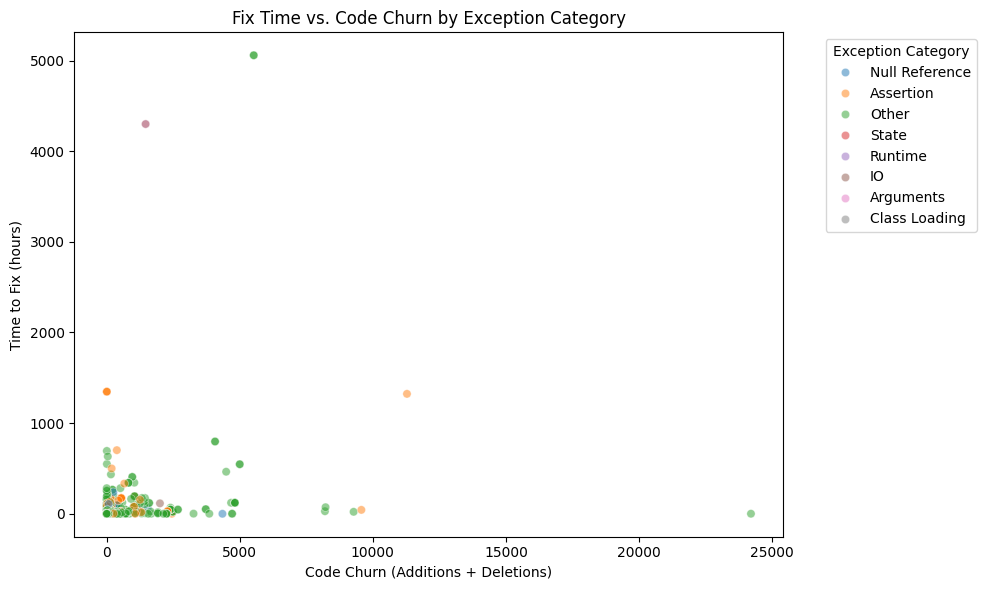

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='code_churn', y='time_to_fix_hours', hue='exception_category', alpha=0.5)
plt.title('Fix Time vs. Code Churn by Exception Category')
plt.xlabel('Code Churn (Additions + Deletions)')
plt.ylabel('Time to Fix (hours)')
plt.legend(title='Exception Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()